# Importes

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

# Lendo o data base e dropando colunas 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv")

df.drop(columns=["CUST_ID", "TENURE"], inplace=True)

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


# Dados nulos

In [4]:
df.isna().sum()


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
df.fillna(df.median(), inplace=True)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

# Normalizando dados

In [6]:
values = Normalizer().fit_transform(df.values)

values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Clusterização

In [7]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pread = kmeans.fit_predict(values)

In [8]:
labels = kmeans.labels_

silhouette = metrics.silhouette_score(values, labels, metric='euclidean')

silhouette

0.3645268652444429

In [9]:
dbs = metrics.davies_bouldin_score(values, labels)

dbs

1.0758562764119166

In [10]:
calinski = metrics.calinski_harabasz_score(values, labels)

calinski

3431.788779759367

## Verificando com diferentes numeros de clusters

In [22]:
def clustering_algorithm(n_clusters, df):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)

    s = metrics.silhouette_score(df, labels, metric='euclidean')

    dbs = metrics.davies_bouldin_score(df, labels)

    calinski = metrics.calinski_harabasz_score(df, labels)

    print(f"silhouette: {s}\ndavies bouldin: {dbs}\ncalinski harabasz:{calinski}\n")

    return s, dbs, calinski

In [14]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)

silhouette: 0.32718018646452657
davies bouldin: 1.3099263090078583
calinski harabasz:3526.457038744187


In [15]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)

silhouette: 0.3644635747161945
davies bouldin: 1.0758620069408935
calinski harabasz:3431.7956206905983


In [16]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)

silhouette: 0.3074837138687235
davies bouldin: 1.1404663351754585
calinski harabasz:3018.0207214342295


## Validando com dados randomicos

In [23]:
random_data = np.random.rand(8950, 16)
s_rand, dbs_rand, calinski_rand = clustering_algorithm(5, random_data)

print(s2, dbs2, calinski2)

silhouette: 0.04063296737429161
davies bouldin: 3.4936838877049845
calinski harabasz:305.73216324884925

0.3644635747161945 1.0758620069408935 3431.7956206905983


## Dividindo a base de dados e validando

In [24]:
set1, set2, set3 = np.array_split(values, 3)

s_set1, dbs_set1, calinski_set1 = clustering_algorithm(5, set1)
s_set2, dbs_set2, calinski_set2 = clustering_algorithm(5, set2)
s_set3, dbs_set3, calinski_set3 = clustering_algorithm(5, set3)

silhouette: 0.36860891867648515
davies bouldin: 1.056334697944936
calinski harabasz:1204.111582769171

silhouette: 0.3538037064965953
davies bouldin: 1.1394936582652302
calinski harabasz:1194.948634553892

silhouette: 0.36713104970461446
davies bouldin: 1.0991014125845049
calinski harabasz:1167.5075975296127



## Visualização da clusterização

<function matplotlib.pyplot.show>

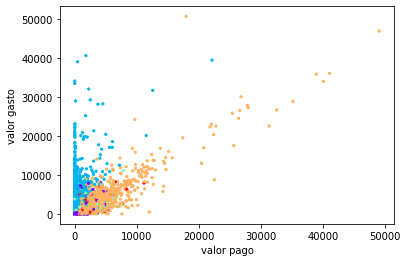

In [28]:
plt.scatter(df.PURCHASES, df.PAYMENTS, c=labels, s=5, cmap="rainbow")

plt.xlabel("valor pago")
plt.ylabel("valor gasto")

plt.show

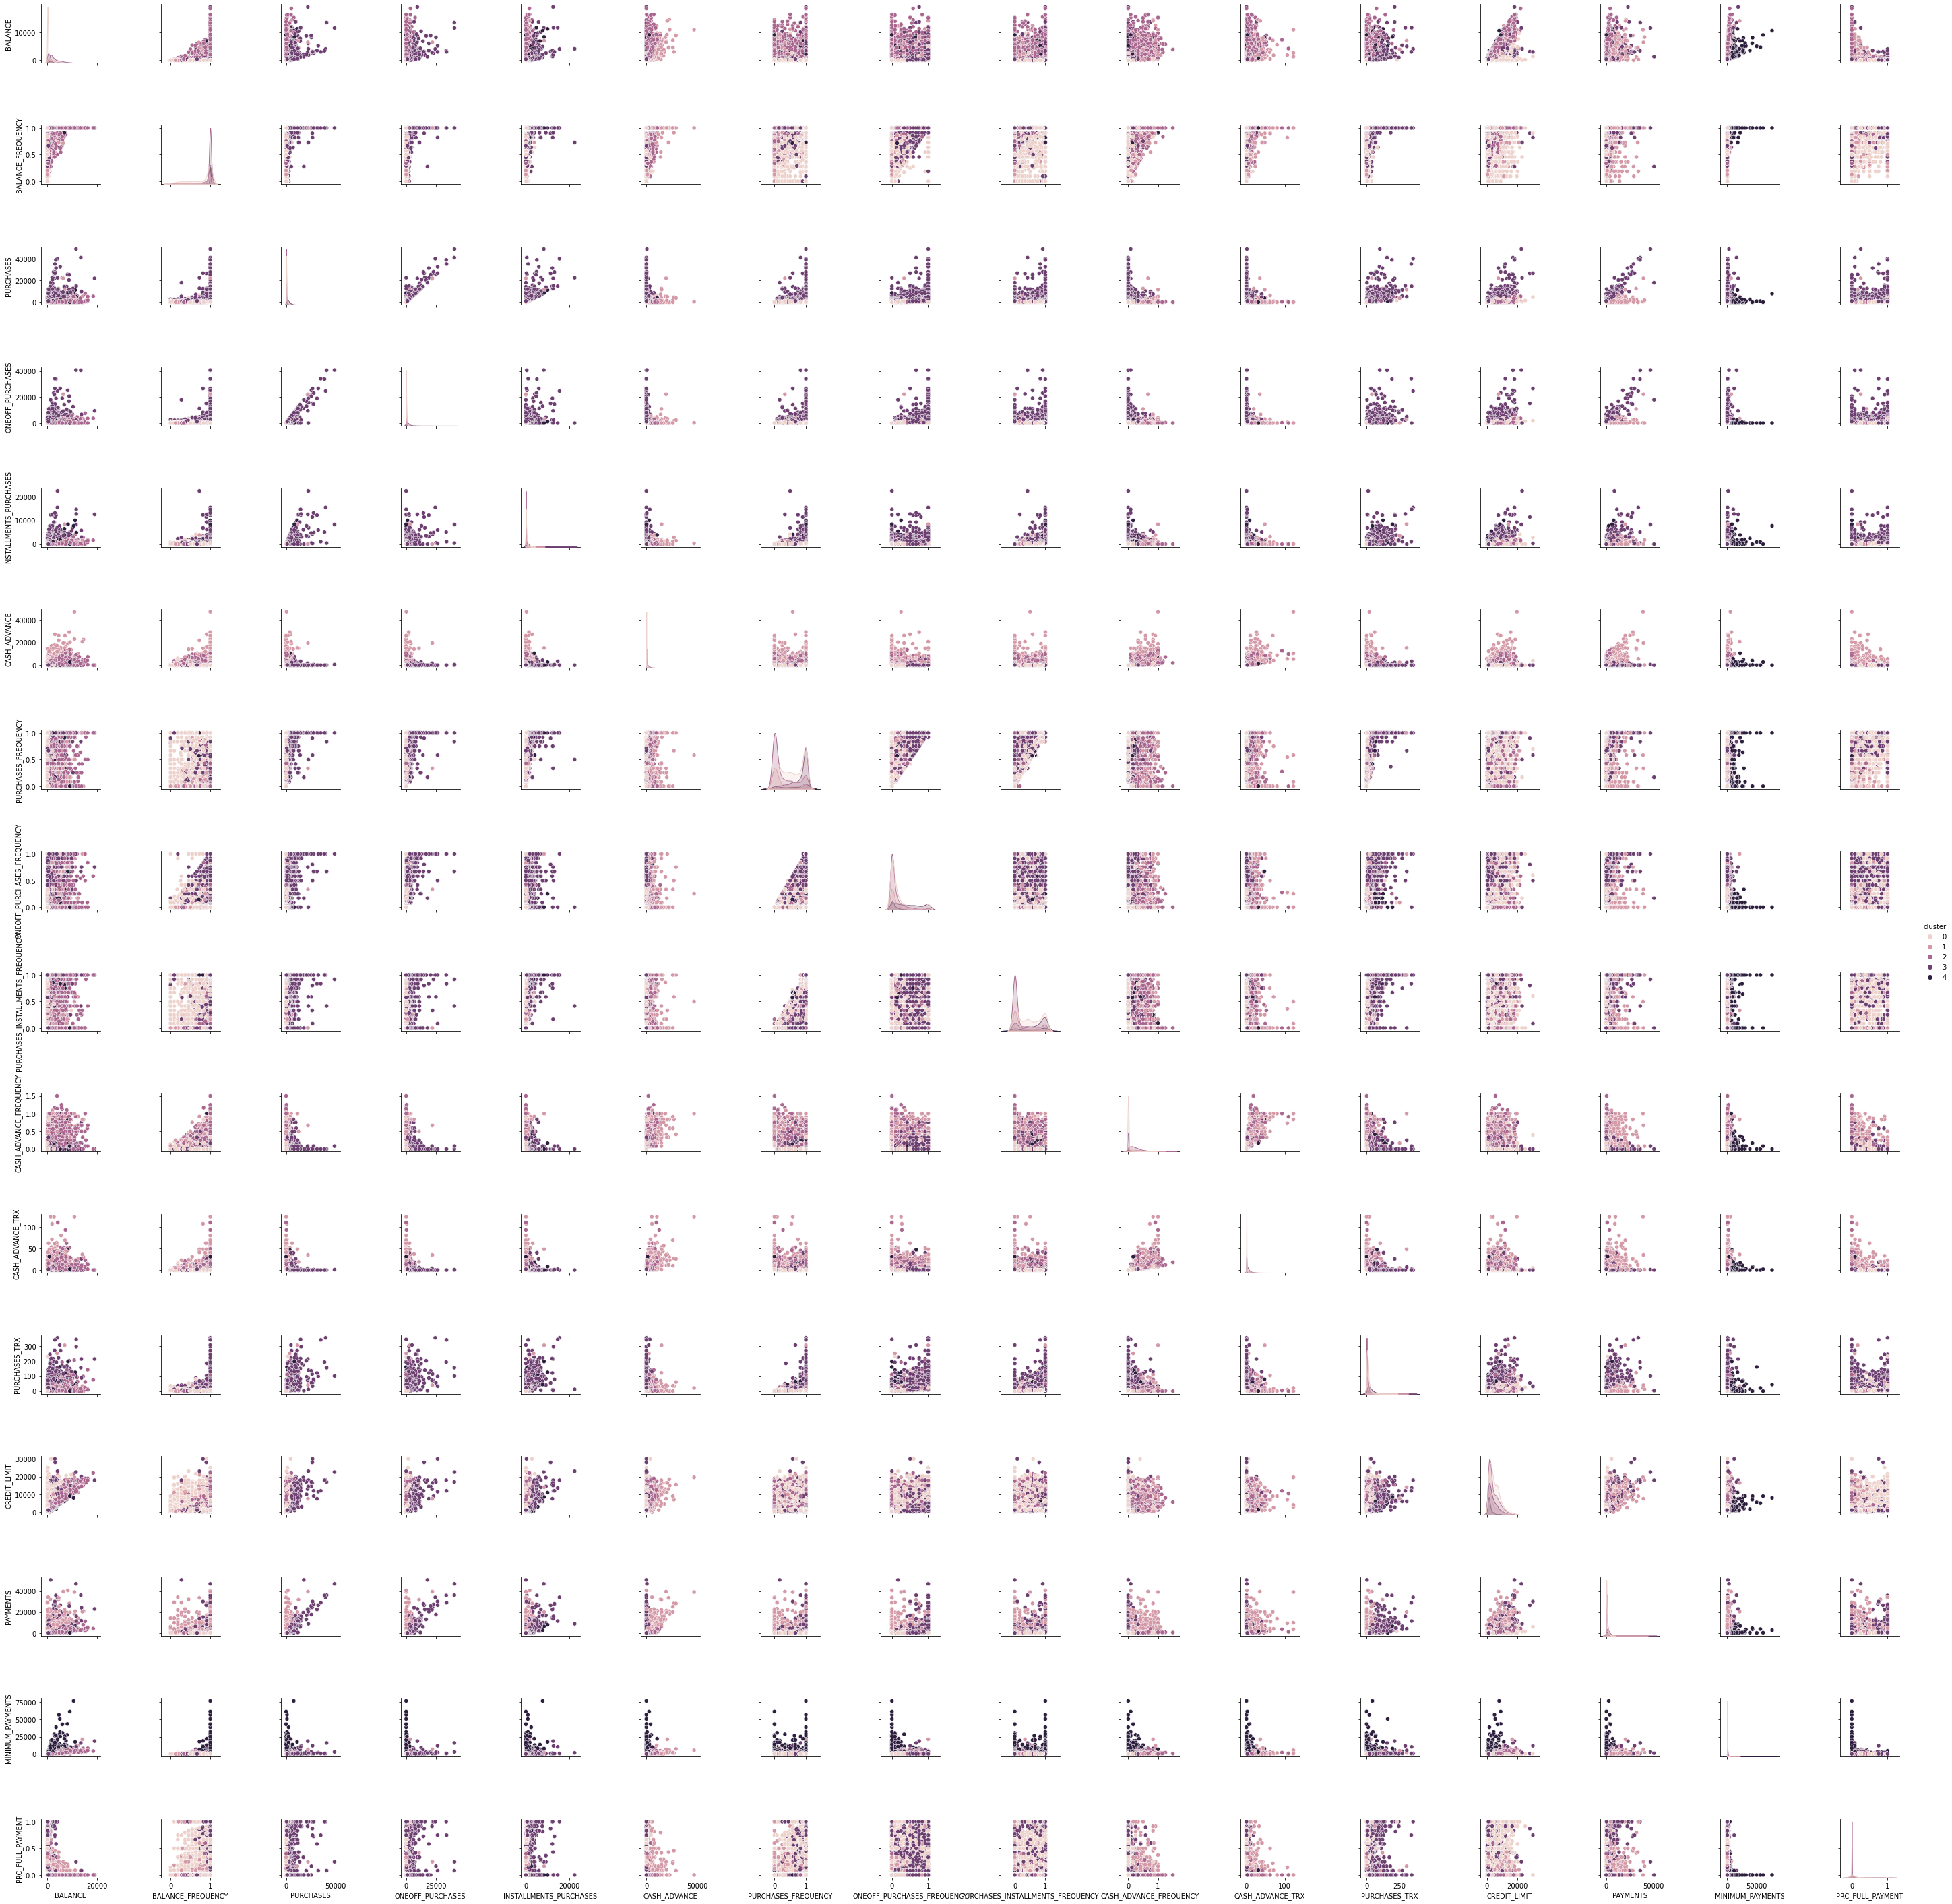

In [31]:
df["cluster"] = labels

sns.pairplot(df[0:], hue="cluster")

## Analisando os valores

In [32]:
df.groupby("cluster").describe( )

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3279.0   443.776995   846.525522   0.000000    23.340435   
1        1072.0  1794.024195  1982.950586   0.000000   506.925348   
2        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
3        1537.0  1143.200471  1665.090233   0.000000   212.282538   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.902896   410.659944   9630.367575            3279.0  0.774514   
1        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
2        2173.994774  4223.858877  18495.558550            2650.0  0.963514   
3         555.131027  1370.317105  19043.138560            1537.0  0.928267   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.766884   4483.503862           3279.0  0.246881   
1        ...       884.718306  21235.065300           1072.0  0.117384   
2        ...      1330.541571   8345.641905           2650.0  0.001798   
3        ...       523.893953  18621.013310           1537.0  0.278258   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346775  0.0  0.0  0.000000  0.444444  1.0  
1        0.186853  0.0  0.0  0.083333  0.142857  1.0  
2        0.023256  0.0  0.0  0.000000  0.000000  0.6  
3        0.367029  0.0  0.0  0.083333  0.545455  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [34]:
centroids = kmeans.cluster_centers_

centroids

array([[6.89799575e-02, 2.30763006e-04, 1.21587120e-01, 4.79794677e-02,
        7.37079733e-02, 2.40200669e-02, 1.73016299e-04, 3.36944404e-05,
        1.40456777e-04, 7.83464589e-06, 1.22859223e-04, 2.86637386e-03,
        9.43639117e-01, 1.53810130e-01, 5.68564456e-02, 7.61967577e-05],
       [2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.04882397e-05,
        3.51921361e-05, 6.54864556e-05, 1.57199032e-03, 1.12217156e-03,
        5.35089146e-01, 5.98040052e-01, 1.04348171e-01, 2.77498236e-05],
       [5.03886149e-01, 2.72144714e-04, 6.15751915e-02, 3.61893482e-02,
        2.54075483e-02, 2.53219709e-01, 6.71312176e-05, 2.56644637e-05,
        4.48814714e-05, 5.75359114e-05, 1.15794119e-03, 1.32612254e-03,
        7.19404134e-01, 1.66061928e-01, 1.79050745e-01, 5.79660872e-07],
       [1.60146324e-01, 2.45102576e-04, 4.38362163e-01, 2.57083619e-01,
        1.81450166e-01, 2.58559897e-02, 2.04225525e-04, 8.904

In [39]:
max = len(centroids[0])

for i in range(max):
  print(df.columns.values[i ], "{:.4f}".format(centroids[:, i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0541
PRC_FULL_PAYMENT 0.0000


Colunas com mais variância
* BALANCE 0.0224
* PURCHASES 0.0196
* CASH_ADVANCE 0.0226
* CREDIT_LIMIT 0.0360
* PAYMENTS 0.0280

In [43]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]

n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients

description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,443.776995,629.282729,140.652097,5130.892579,814.340168,3279
1,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
2,3036.946177,385.299102,1637.380994,4495.584906,968.775192,2650
3,1143.200471,3273.169610,183.376625,4102.966917,3040.897739,1537
4,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412


* CLUSTER 1: Menor valor em saldo. Menor valor em 
saques. Maior limite. Maior numeor de clientes

* CLUSTER 2: Maior valor em saques.

* CLUSTER 3: Maior valor em saldo. Menor valor em gastos. Piores pagadores

* CLUSTER 4: Maior valor em gastos. Melhores Pagadores.

* CLUSTER 5: Menor limite. Menor numero de clientes

* CLUSTER 1: Clientes que gastam pouco.

* CLUSTER 2: Clientes que sacam muito

* CLUSTER 3: Clientes com maior balança mas gastam pouco

* CLUSTER 4: Clientes que gastam muito

* CLUSTER 5: Grupo com menor quantidade de clientes

In [44]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3279.0,0.246881,0.346775,0.0,0.0,0.000000,0.444444,1.0
1,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
2,2650.0,0.001798,0.023256,0.0,0.0,0.000000,0.000000,0.6
3,1537.0,0.278258,0.367029,0.0,0.0,0.083333,0.545455,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
